# This is simple tutorial to introduce you to pytorch and neural networks.

First we import the necessary libraries 

In [4]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

We import the MNIST dataset, its a toy data for practicing: We differentiate the training dataset and the test dataset
    the training data is to train the NN and the test data is to test our accuracy after the training is finished

In [5]:

train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download = True)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100,shuffle=True)
#, transform=transforms.ToTensor()

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=100, shuffle=False)

Build a normal feedforward multilayer perceptron (MLP) NN by fixing the sizes of the neurons on each layer including the hidden layer

In [6]:
class NeuralNet(nn.Module):
    """A Neural Network with a hidden layer"""
    def __init__(self, input_size,hidden_size,output_size):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        output = self.layer1(x)
        output = self.relu(output)
        output = self.layer2(output)
        return output

Build a Convolutional Neural Network you can add the layers as much as we want

In [12]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

Fix the NN parameters during training of the networks. this parameters are done for MLP (the above neural network)

In [14]:
input_size = 784
hidden_size = 500
output_size = 10
num_epochs = 5

learning_rate = 0.001

model = NeuralNet(input_size,hidden_size, output_size)

lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Training the MLP using the data and the above parameters: for 5 epoches 

In [9]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28)
        #show_batch(images)
        out = model(images)
        loss = lossFunction(out,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/600], Loss: 0.3573
Epoch [1/5], Step [200/600], Loss: 0.4312
Epoch [1/5], Step [300/600], Loss: 0.2016
Epoch [1/5], Step [400/600], Loss: 0.1329
Epoch [1/5], Step [500/600], Loss: 0.2013
Epoch [1/5], Step [600/600], Loss: 0.0905
Epoch [2/5], Step [100/600], Loss: 0.0968
Epoch [2/5], Step [200/600], Loss: 0.1155
Epoch [2/5], Step [300/600], Loss: 0.1775
Epoch [2/5], Step [400/600], Loss: 0.0586
Epoch [2/5], Step [500/600], Loss: 0.0788
Epoch [2/5], Step [600/600], Loss: 0.1213
Epoch [3/5], Step [100/600], Loss: 0.0522
Epoch [3/5], Step [200/600], Loss: 0.1272
Epoch [3/5], Step [300/600], Loss: 0.1144
Epoch [3/5], Step [400/600], Loss: 0.0337
Epoch [3/5], Step [500/600], Loss: 0.0984
Epoch [3/5], Step [600/600], Loss: 0.0679
Epoch [4/5], Step [100/600], Loss: 0.0697
Epoch [4/5], Step [200/600], Loss: 0.0773
Epoch [4/5], Step [300/600], Loss: 0.0372
Epoch [4/5], Step [400/600], Loss: 0.0538
Epoch [4/5], Step [500/600], Loss: 0.2141
Epoch [4/5], Step [600/600], Loss:

This code below evaluates the model we trained before using the test dataset: It shows the accuracy of correctly clasifying 
    the test data

In [11]:
with torch.no_grad():
    correct = 0
    total = 0
    for images,labels in test_loader:
        images = images.reshape(-1,28*28)
        out = model(images)
        _,predicted = torch.max(out.data,1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 97.93 %


Training The CNN by fixing its parameters: we can use the previous parameters but some times the dont't match so we define them again

In [15]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

Training The CNN and building the CNN model

In [16]:
model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.1489
Epoch [1/5], Step [200/600], Loss: 0.0716
Epoch [1/5], Step [300/600], Loss: 0.0666
Epoch [1/5], Step [400/600], Loss: 0.0367
Epoch [1/5], Step [500/600], Loss: 0.0455
Epoch [1/5], Step [600/600], Loss: 0.0476
Epoch [2/5], Step [100/600], Loss: 0.0228
Epoch [2/5], Step [200/600], Loss: 0.0201
Epoch [2/5], Step [300/600], Loss: 0.0254
Epoch [2/5], Step [400/600], Loss: 0.0464
Epoch [2/5], Step [500/600], Loss: 0.0292
Epoch [2/5], Step [600/600], Loss: 0.0302
Epoch [3/5], Step [100/600], Loss: 0.0059
Epoch [3/5], Step [200/600], Loss: 0.0250
Epoch [3/5], Step [300/600], Loss: 0.0599
Epoch [3/5], Step [400/600], Loss: 0.0405
Epoch [3/5], Step [500/600], Loss: 0.0893
Epoch [3/5], Step [600/600], Loss: 0.0358
Epoch [4/5], Step [100/600], Loss: 0.0157
Epoch [4/5], Step [200/600], Loss: 0.0439
Epoch [4/5], Step [300/600], Loss: 0.0414
Epoch [4/5], Step [400/600], Loss: 0.0188
Epoch [4/5], Step [500/600], Loss: 0.0439
Epoch [4/5], Step [600/600], Loss:

Evaluatin the model using the test data to gain the accuracy of the CNN model training above

In [17]:
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 99.11 %


In [30]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [31]:
classes = ('1', '2', '3', '4','5', '6', '7', '8', '9', '0')

    2 horse     1     1


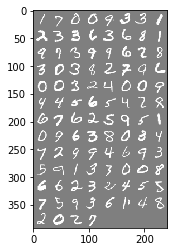

In [32]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))